In [1]:
import pandas as pd
import nltk

# 1. Import Data

In [2]:
posts = pd.read_csv("jcs posts.csv")
posts

C:\Users\jing_\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,postUrl,description,commentCount,likeCount,pubDate,likedByViewer,isSidecar,type,profileUrl,username,...,taggedFullName16,taggedUsername16,taggedFullName17,taggedUsername17,taggedFullName18,taggedUsername18,taggedFullName19,taggedUsername19,taggedFullName20,taggedUsername20
0,https://www.instagram.com/p/Carbyd-PBvX/,"Lim Tao is a kind and selfless young man, who ...",10,415,2022-03-04T10:31:53.000Z,False,True,Photo,https://www.instagram.com/asr.jc,asr.jc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.instagram.com/p/Carbyd-PBvX/,"Lim Tao is a kind and selfless young man, who ...",10,415,2022-03-04T10:31:53.000Z,False,True,Photo,https://www.instagram.com/asr.jc,asr.jc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.instagram.com/p/Carbyd-PBvX/,"Lim Tao is a kind and selfless young man, who ...",10,415,2022-03-04T10:31:53.000Z,False,True,Photo,https://www.instagram.com/asr.jc,asr.jc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.instagram.com/p/Carbyd-PBvX/,"Lim Tao is a kind and selfless young man, who ...",10,415,2022-03-04T10:31:53.000Z,False,True,Photo,https://www.instagram.com/asr.jc,asr.jc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.instagram.com/p/CapFokNJbd_/,"Wei Jie is an inquisitive learner, who has dev...",1,303,2022-03-03T12:39:48.000Z,False,True,Photo,https://www.instagram.com/asr.jc,asr.jc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34881,https://www.instagram.com/p/BoJOpVelPIk/,Behind the scenes of the YIJC crest: since the...,0,50,2018-09-25T09:33:09.000Z,NaN,True,Photo,https://instagram.com/yishuninnovajc,yishuninnovajc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34882,https://www.instagram.com/p/BoJOpVelPIk/,Behind the scenes of the YIJC crest: since the...,0,50,2018-09-25T09:33:09.000Z,NaN,True,Photo,https://instagram.com/yishuninnovajc,yishuninnovajc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34883,https://www.instagram.com/p/BoJOpVelPIk/,Behind the scenes of the YIJC crest: since the...,0,50,2018-09-25T09:33:09.000Z,NaN,True,Photo,https://instagram.com/yishuninnovajc,yishuninnovajc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34884,https://www.instagram.com/p/BoJOS1hlyjT/,What a momentous occasion for our students at ...,0,46,2018-09-25T09:30:05.000Z,NaN,True,Photo,https://instagram.com/yishuninnovajc,yishuninnovajc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 2. Data Cleaning

In [3]:
filtered_posts = posts[["description"]]
filtered_posts = filtered_posts.drop_duplicates()
filtered_posts

,description
0,"Lim Tao is a kind and selfless young man, who ..."
4,"Wei Jie is an inquisitive learner, who has dev..."
8,"When she was 12, Karis almost quit dance for g..."
12,Benn is a driven young man who dedicates his t...
16,"Ian is an exemplary self-directed learner, esp..."
...,...
34870,Don’t miss our feature on the Straits Times! (...
34871,"While the JC1s were out bowling, the teachers ..."
34873,We are excited to share the launch of our new ...
34874,Behind the scenes of the YIJC crest: since the...


### 2.1 Regex

In [5]:
import re
import emoji
# Define a function to clean the text
def clean(text):
#     print(text)
# Removes all special characters and numericals leaving the alphabets
#     text = re.sub(r'https?://\S+', "")
#     text = re.sub('\\n', '')
    
    text = re.sub(r'http\S+', '', str(text))
    text = re.sub(r'https?://\S+', "", str(text))
    text = re.sub(r'@\S+', "", str(text))
    text = re.sub(r'#\S+', "", str(text))
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    text = text.lower()
    emoji_list = [c for c in text if c in emoji.UNICODE_EMOJI]
    clean_text = ' '.join([str for str in str(text).split() if not any(i in str for i in emoji_list)])

    return clean_text

# Cleaning the text in the Text column
filtered_posts['cleaned'] = filtered_posts['description'].apply(clean)
filtered_posts.head()

,description,cleaned
0,"Lim Tao is a kind and selfless young man, who ...",lim tao is a kind and selfless young man who b...
4,"Wei Jie is an inquisitive learner, who has dev...",wei jie is an inquisitive learner who has deve...
8,"When she was 12, Karis almost quit dance for g...",when she was karis almost quit dance for good ...
12,Benn is a driven young man who dedicates his t...,benn is a driven young man who dedicates his t...
16,"Ian is an exemplary self-directed learner, esp...",ian is an exemplary self directed learner espe...


In [6]:
print(filtered_posts['cleaned'].iloc[0])

lim tao is a kind and selfless young man who believed strongly in giving back to the asr community having experienced the college s rich culture of care and warmth as the vice president of the outdoor activities club odac he was as an exemplary role model to others and was always ready to offer an encouraging word to his peers during their strenuous training sessions lim tao is a highly responsible and capable individual who strongly believes in helping his peers to have the most fulfilling cca journey this belief drove him to frequently stay back after co curricular activity cca sessions to plan robust training programmes with the cca executive committee and to formulate plans and think of new ideas to drive his cca forward lim tao was also a college ambassador for the college where he contributed significantly to for the preparation and running of open house and orientation as he was determined to portray asr in the best light as he could he joined the media team and created promotio

### 2.2 Tokenization & Stopwords

In [7]:
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.corpus import wordnet

stop_words = stopwords.words('english')
stop_words.extend(['nbsp', 'student', 'school', 'us', 'year', 'also', 'pm', 'th', 'tinyurl'])

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stop_words):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

filtered_posts['POS tagged'] = filtered_posts['cleaned'].apply(token_stop_pos)
filtered_posts.head()

,description,cleaned,POS tagged
0,"Lim Tao is a kind and selfless young man, who ...",lim tao is a kind and selfless young man who b...,"[(lim, a), (tao, n), (kind, n), (selfless, n),..."
4,"Wei Jie is an inquisitive learner, who has dev...",wei jie is an inquisitive learner who has deve...,"[(wei, n), (jie, n), (inquisitive, a), (learne..."
8,"When she was 12, Karis almost quit dance for g...",when she was karis almost quit dance for good ...,"[(karis, a), (almost, r), (quit, n), (dance, n..."
12,Benn is a driven young man who dedicates his t...,benn is a driven young man who dedicates his t...,"[(benn, n), (driven, a), (young, a), (man, n),..."
16,"Ian is an exemplary self-directed learner, esp...",ian is an exemplary self directed learner espe...,"[(ian, n), (exemplary, a), (self, n), (directe..."


### 2.3 Lemmatization

In [8]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

filtered_posts['Lemma'] = filtered_posts['POS tagged'].apply(lemmatize)
filtered_posts.head()

,description,cleaned,POS tagged,Lemma
0,"Lim Tao is a kind and selfless young man, who ...",lim tao is a kind and selfless young man who b...,"[(lim, a), (tao, n), (kind, n), (selfless, n),...",lim tao kind selfless young man believe stro...
4,"Wei Jie is an inquisitive learner, who has dev...",wei jie is an inquisitive learner who has deve...,"[(wei, n), (jie, n), (inquisitive, a), (learne...",wei jie inquisitive learner develop holistic...
8,"When she was 12, Karis almost quit dance for g...",when she was karis almost quit dance for good ...,"[(karis, a), (almost, r), (quit, n), (dance, n...",karis almost quit dance good much interest b...
12,Benn is a driven young man who dedicates his t...,benn is a driven young man who dedicates his t...,"[(benn, n), (driven, a), (young, a), (man, n),...",benn driven young man dedicate time serve co...
16,"Ian is an exemplary self-directed learner, esp...",ian is an exemplary self directed learner espe...,"[(ian, n), (exemplary, a), (self, n), (directe...",ian exemplary self direct learner especially...


### 2.4 Lemma Tokenization

In [9]:
def tokenize(text):
    new_text = word_tokenize(text)
    return new_text
filtered_posts['lemma_tokens'] = filtered_posts['Lemma'].apply(tokenize)
filtered_posts

,description,cleaned,POS tagged,Lemma,lemma_tokens
0,"Lim Tao is a kind and selfless young man, who ...",lim tao is a kind and selfless young man who b...,"[(lim, a), (tao, n), (kind, n), (selfless, n),...",lim tao kind selfless young man believe stro...,"[lim, tao, kind, selfless, young, man, believe..."
4,"Wei Jie is an inquisitive learner, who has dev...",wei jie is an inquisitive learner who has deve...,"[(wei, n), (jie, n), (inquisitive, a), (learne...",wei jie inquisitive learner develop holistic...,"[wei, jie, inquisitive, learner, develop, holi..."
8,"When she was 12, Karis almost quit dance for g...",when she was karis almost quit dance for good ...,"[(karis, a), (almost, r), (quit, n), (dance, n...",karis almost quit dance good much interest b...,"[karis, almost, quit, dance, good, much, inter..."
12,Benn is a driven young man who dedicates his t...,benn is a driven young man who dedicates his t...,"[(benn, n), (driven, a), (young, a), (man, n),...",benn driven young man dedicate time serve co...,"[benn, driven, young, man, dedicate, time, ser..."
16,"Ian is an exemplary self-directed learner, esp...",ian is an exemplary self directed learner espe...,"[(ian, n), (exemplary, a), (self, n), (directe...",ian exemplary self direct learner especially...,"[ian, exemplary, self, direct, learner, especi..."
...,...,...,...,...,...
34870,Don’t miss our feature on the Straits Times! (...,don t miss our feature on the straits times oc...,"[(miss, v), (feature, n), (straits, n), (times...",miss feature strait time oct sunday yishun i...,"[miss, feature, strait, time, oct, sunday, yis..."
34871,"While the JC1s were out bowling, the teachers ...",while the jc s were out bowling the teachers c...,"[(jc, n), (bowling, v), (teachers, n), (came, ...",jc bowl teacher come play teacher yjc ijc co...,"[jc, bowl, teacher, come, play, teacher, yjc, ..."
34873,We are excited to share the launch of our new ...,we are excited to share the launch of our new ...,"[(excited, v), (share, n), (launch, n), (new, ...",excite share launch new college crest proces...,"[excite, share, launch, new, college, crest, p..."
34874,Behind the scenes of the YIJC crest: since the...,behind the scenes of the yijc crest since the ...,"[(behind, None), (scenes, n), (yijc, n), (cres...",behind scene yijc crest since announcement m...,"[behind, scene, yijc, crest, since, announceme..."


# 3. Topic Modelling

In [10]:
from gensim.corpora import Dictionary
from gensim.models.ldamulticore import LdaMulticore

# Create a id2word dictionary
id2word = Dictionary(filtered_posts['lemma_tokens'])
print(len(id2word))
# Filtering Extremes
id2word.filter_extremes(no_below=2, no_above=.99)
print(len(id2word))
# Creating a corpus object 
corpus = [id2word.doc2bow(d) for d in filtered_posts['lemma_tokens']]
# Instantiating a Base LDA model 
base_model = LdaMulticore(corpus=corpus, num_topics=10, id2word=id2word, workers=12, passes=5)
# Filtering for words 
words = [re.findall(r'"([^"]*)"',t[1]) for t in base_model.print_topics()]
# Create Topics
topics = [' '.join(t[0:10]) for t in words]
# Getting the topics
for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

21448
11990
------ Topic 0 ------
student singapore team award well college leader programme art make

------ Topic 1 ------
student team division link come time music video get well

------ Topic 2 ------
student college open make come house see work first get

------ Topic 3 ------
student team award learn singapore like science one challenge competition

------ Topic 4 ------
student teacher one award make time like best would mr

------ Topic 5 ------
day teacher student one time hope happy today together class

------ Topic 6 ------
team best come see girl season final hard sport boy

------ Topic 7 ------
day hey hope week make see raffle time come get

------ Topic 8 ------
house open come experience day find take one make college

------ Topic 9 ------
house student singapore event one mr sji time cg community



# 4. Network Analysis

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

all_text = filtered_posts.Lemma.values.tolist()
# clean_text = ' '.join([str[1] for str in str(text).split() if not any(i in str for i in emoji_list)])

cv = CountVectorizer(ngram_range=(1,1), stop_words = 'english') # You can define your own parameters
X = cv.fit_transform(all_text)

In [12]:
Xc = (X.T * X) # This is the matrix manipulation step
Xc.setdiag(0) # We set the diagonals to be zeroes as it's pointless to be 1

In [13]:
names = cv.get_feature_names() # This are the entity names (i.e. keywords)
df = pd.DataFrame(data = Xc.toarray(), columns = names, index = names)
df.to_csv('to gephi.csv', sep = ',')

C:\Users\jing_\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 5. Post Likes & Comments Analysis

In [25]:
likes_comments = posts[['description', 'likeCount', 'commentCount', 'query']]
likes_comments = likes_comments.drop_duplicates()
likes_comments

,description,likeCount,commentCount,query
0,"Lim Tao is a kind and selfless young man, who ...",415,10,https://instagram.com/asr.jc
4,"Wei Jie is an inquisitive learner, who has dev...",303,1,https://instagram.com/asr.jc
8,"When she was 12, Karis almost quit dance for g...",338,9,https://instagram.com/asr.jc
12,Benn is a driven young man who dedicates his t...,285,0,https://instagram.com/asr.jc
16,"Ian is an exemplary self-directed learner, esp...",416,11,https://instagram.com/asr.jc
...,...,...,...,...
34870,Don’t miss our feature on the Straits Times! (...,84,0,https://instagram.com/yishuninnovajc
34871,"While the JC1s were out bowling, the teachers ...",67,1,https://instagram.com/yishuninnovajc
34873,We are excited to share the launch of our new ...,51,0,https://instagram.com/yishuninnovajc
34874,Behind the scenes of the YIJC crest: since the...,50,0,https://instagram.com/yishuninnovajc


In [47]:
usernames = likes_comments['query'].unique()
usernames

array(['https://instagram.com/asr.jc', 'https://instagram.com/asr.jcians',
       'https://instagram.com/acjc_official',
       'https://instagram.com/indeponline',
       'https://instagram.com/catholic.jc',
       'https://instagram.com/_d.hype',
       'https://instagram.com/dhs.seniorhigh',
       'https://instagram.com/eunoiajc', 'https://instagram.com/ejboleh',
       'https://instagram.com/hwachong.official',
       'https://instagram.com/jpjc.official',
       'https://instagram.com/peopleofmillennia',
       'https://instagram.com/heynanyang',
       'https://instagram.com/nationaljc',
       'https://instagram.com/nushigh.lights',
       'https://instagram.com/raffles_institution',
       'https://instagram.com/teamraffles',
       'https://instagram.com/rivervalleysg',
       'https://instagram.com/sajc_official',
       'https://instagram.com/stjosephsinstitution',
       'https://instagram.com/thatsmyjc',
       'https://instagram.com/temasekjc',
       'https://instagram.

<Figure size 5040x720 with 0 Axes>

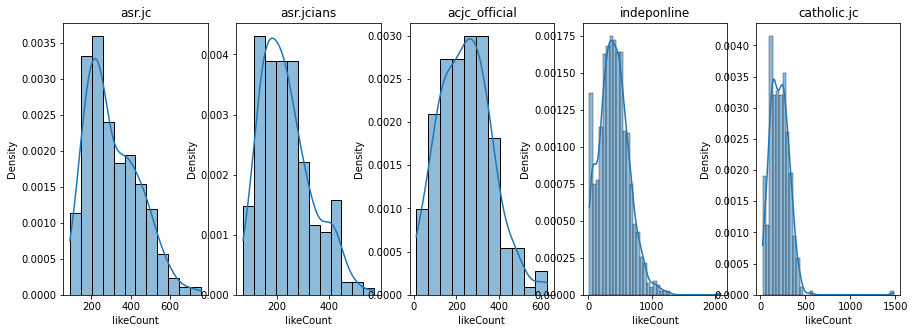

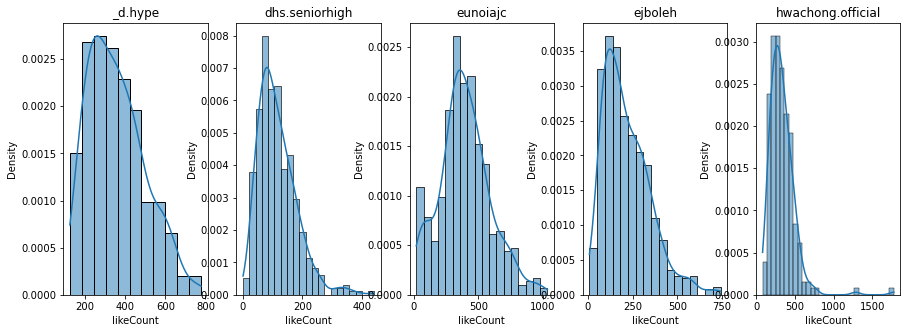

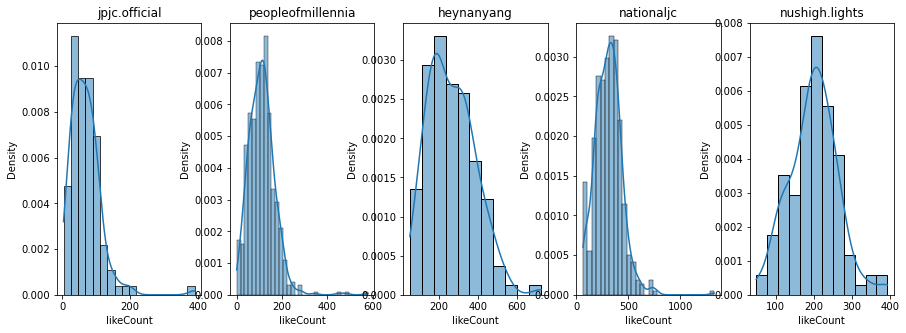

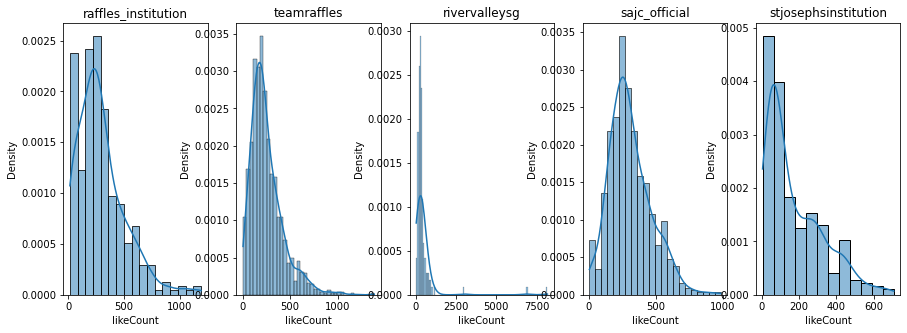

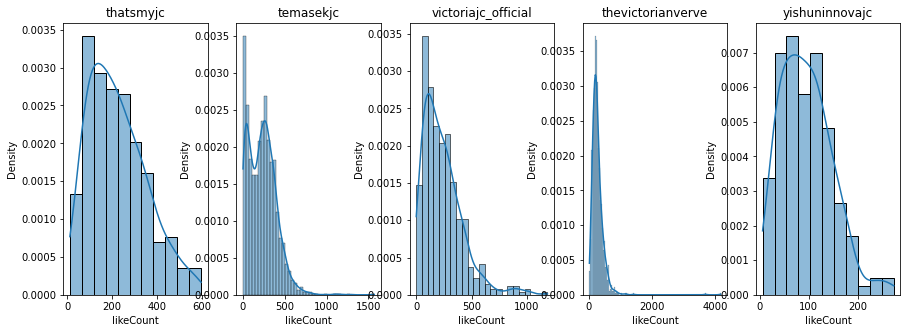

In [57]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

count=0

plt.figure(figsize=(70,10))

for i in range(1,6):
    f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(15,5))
    indiv_likes = likes_comments[likes_comments['query']==usernames[count]]
    sns.histplot(indiv_likes["likeCount"], kde=True, stat='density', ax = ax1)
    ax1.set_title(usernames[count].split("/")[-1])
    count +=1
    indiv_likes = likes_comments[likes_comments['query']==usernames[count]]
    sns.histplot(indiv_likes["likeCount"], kde=True, stat='density', ax = ax2)
    ax2.set_title(usernames[count].split("/")[-1])
    count +=1
    indiv_likes = likes_comments[likes_comments['query']==usernames[count]]
    sns.histplot(indiv_likes["likeCount"], kde=True, stat='density', ax = ax3)
    ax3.set_title(usernames[count].split("/")[-1])
    count+=1
    indiv_likes = likes_comments[likes_comments['query']==usernames[count]]
    sns.histplot(indiv_likes["likeCount"], kde=True, stat='density', ax = ax4)
    ax4.set_title(usernames[count].split("/")[-1])
    count+=1
    indiv_likes = likes_comments[likes_comments['query']==usernames[count]]
    sns.histplot(indiv_likes["likeCount"], kde=True, stat='density', ax = ax5)
    ax5.set_title(usernames[count].split("/")[-1])
    count+=1

# fig.suptitle('JCs LikeCount Histograms',fontsize=20)
fig.tight_layout()

# plt.plot()


<Figure size 5040x720 with 0 Axes>

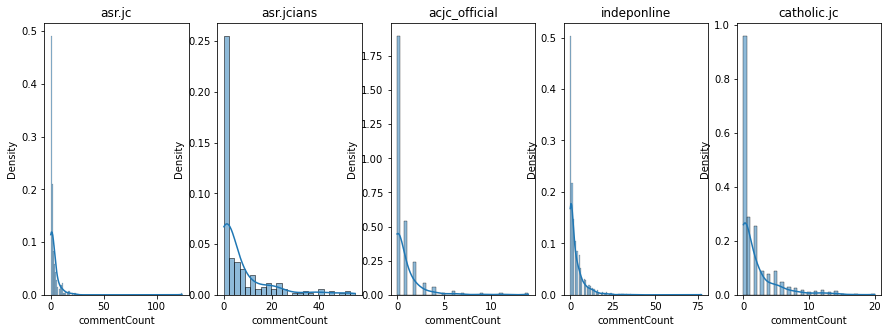

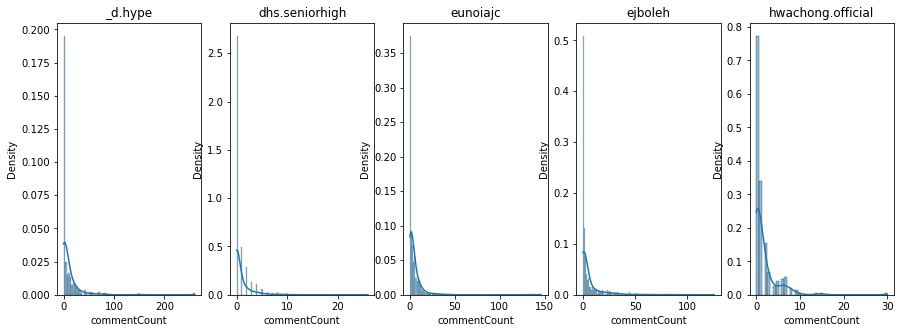

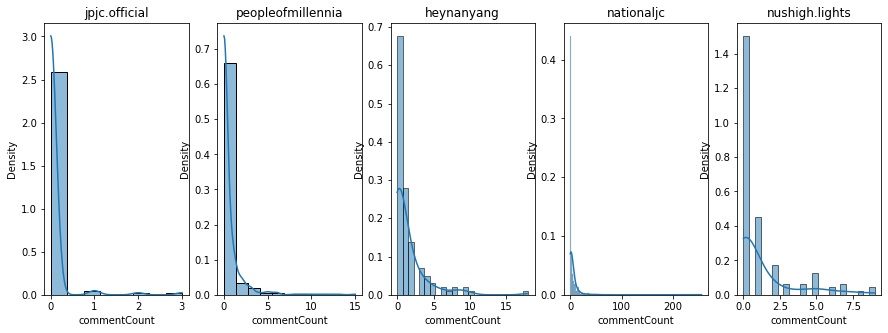

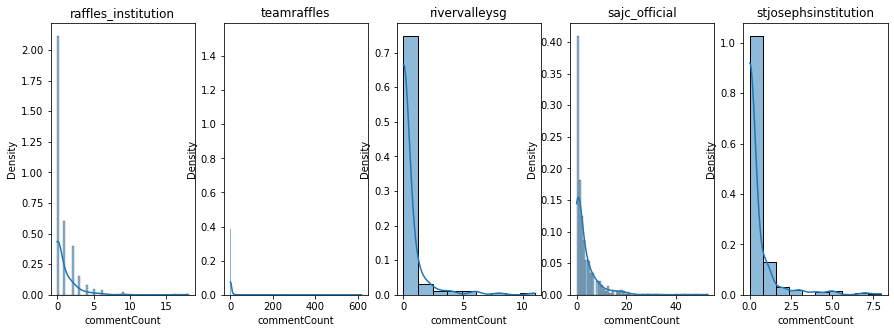

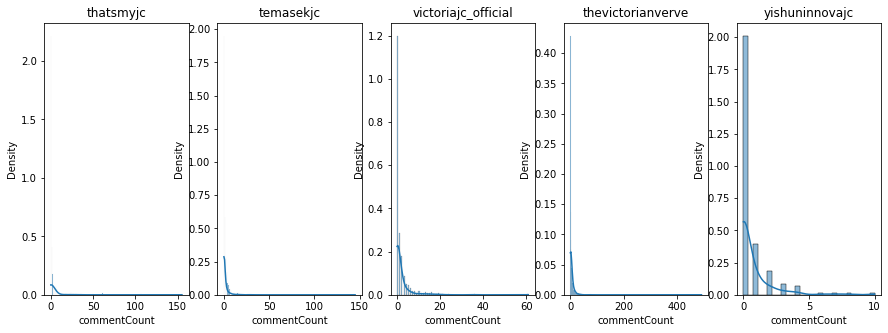

In [59]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

count=0

plt.figure(figsize=(70,10))

for i in range(1,6):
    f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(15,5))
    indiv_likes = likes_comments[likes_comments['query']==usernames[count]]
    sns.histplot(indiv_likes["commentCount"], kde=True, stat='density', ax = ax1)
    ax1.set_title(usernames[count].split("/")[-1])
    count +=1
    indiv_likes = likes_comments[likes_comments['query']==usernames[count]]
    sns.histplot(indiv_likes["commentCount"], kde=True, stat='density', ax = ax2)
    ax2.set_title(usernames[count].split("/")[-1])
    count +=1
    indiv_likes = likes_comments[likes_comments['query']==usernames[count]]
    sns.histplot(indiv_likes["commentCount"], kde=True, stat='density', ax = ax3)
    ax3.set_title(usernames[count].split("/")[-1])
    count+=1
    indiv_likes = likes_comments[likes_comments['query']==usernames[count]]
    sns.histplot(indiv_likes["commentCount"], kde=True, stat='density', ax = ax4)
    ax4.set_title(usernames[count].split("/")[-1])
    count+=1
    indiv_likes = likes_comments[likes_comments['query']==usernames[count]]
    sns.histplot(indiv_likes["commentCount"], kde=True, stat='density', ax = ax5)
    ax5.set_title(usernames[count].split("/")[-1])
    count+=1

# plt.suptitle('JCs Comment Count Histograms',fontsize=20)
fig.tight_layout()


In [48]:
print(indiv_likes["likeCount"].max())

274
